# Model validation altimetry

Note: this notebook requires the model output data

In [4]:
import matplotlib.pyplot as plt
import modelskill as ms
import helper as h

In [5]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"    
# mr_fldr = "../output_sample/"     # use this if you have not downloaded the full data from Zenodo yet
mr_fn = [f"{mr_fldr}Area_2014_2018.dfsu",f"{mr_fldr}Area_2019_2022.dfsu"]

save_png = False if "sample" in mr_fldr else True

In [6]:
altlist = h.get_altimetry_obs(quality=None)

In [7]:
ds = h.read_and_concatenate_ds(mr_fn)

In [10]:
mr = ms.DfsuModelResult(ds[0], name="MIKE21")
mr

<DfsuModelResult>: MIKE21
Time: 2014-01-01 00:00:00 - 2022-12-31 23:00:00
Quantity: Surface Elevation [m]

In [11]:
cmps = []
match_t = "2022" # You can choose a specific time period here
for o in altlist:
    print(f"Processing {o.name}...")
    try:
        cmp = ms.match(obs=o.sel(time=match_t), mod=mr) 
        cmps.append(cmp.remove_bias())
    except Exception as e:
        print(e)    
cc = ms.ComparerCollection(cmps)

Processing 3b...
Processing c2...


c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(


Processing j2...
"not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."
Processing sa...


c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(


In [12]:
cc.skill().round(4)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
3b,41,0.0,0.1069,0.1069,0.0930,0.9595,0.3095,0.9187
c2,11,-0.0,0.0985,0.0985,0.0941,0.8943,0.4780,0.7994
sa,10,-0.0,0.1660,0.1660,0.1515,0.8954,0.5595,0.7961


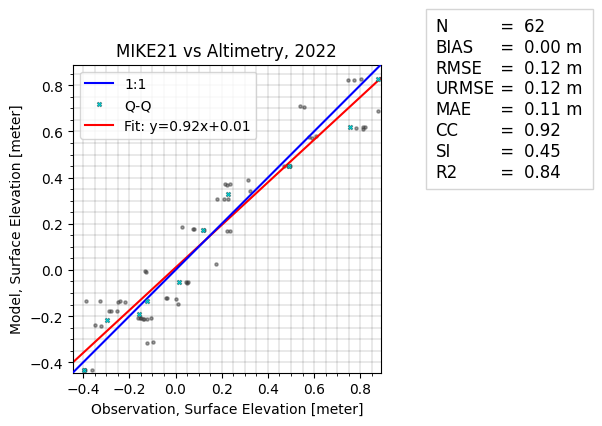

In [13]:
cc.plot.scatter(skill_table=True, figsize=(5,4));
plt.title("MIKE21 vs Altimetry, "+match_t)
if save_png: plt.savefig("../figures/altimetry_comparison.png", bbox_inches="tight")

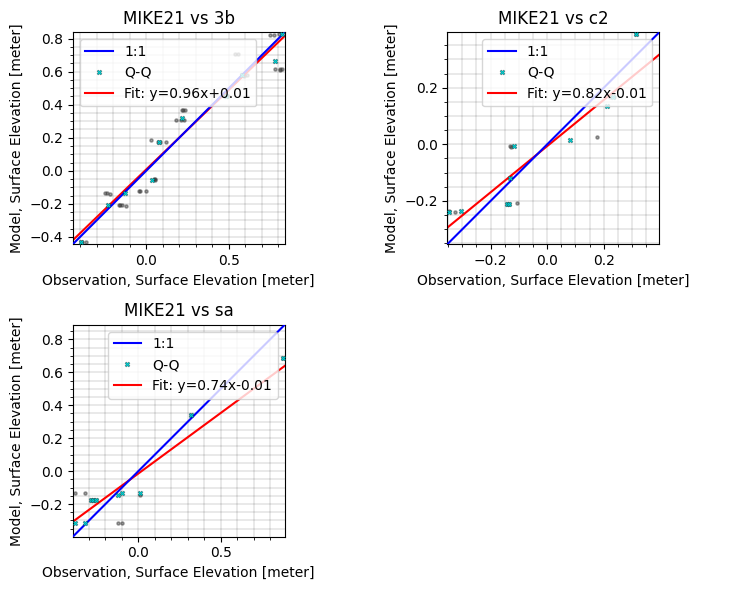

In [19]:
fig, axs = plt.subplots(-(-len(cc)//2), 2, figsize=(8,len(cc)*2))
axs = axs.flatten()
for i in range(len(cc)):
    cc[i].sel().plot.scatter(ax=axs[i])

if len(cc) % 2 != 0:
    axs[-1].axis("off")
plt.tight_layout()
plt.show()